# 8. Dimensinality Reduction

training set에 많은 feature들이 있으면 training 시간이 많이 걸리고, 성능을 떨어트린다. 데이터는 차원이 높아질수록 데이터간의 거리가 멀어지는데, 이것을 차원의 저주라고 부른다(curse of dimensinality). 이 문제를 해결하기 위해서는 feature를 줄여주면 된다. feature를 줄이면 속도는 빨라지지만, 정보가 줄어들기 때문에 약간의 성능 저하가 있을 수 있다. 그래서 차원 축소를 하기 전에 먼저 Original data를 training 시켜보는 것이 좋다. 사람들은 2차원 까지만 생각할 수 있기 때문에 데이터 시각화에도 유용하다. 차원 축소는 대표적으로 PCA와 LLE가 있다.





### Curse of Dimensionality

차원이 커지면 커질수록 데이터 간의 거리가 멀어진다. 그래서 그래프 상으로 보게 되면 엄청 떨어져 있는 모습을 볼 수 있다. 이 상태로 모델을 돌리면 overfitting 될 가능성이 크다. 첫번째 방법은 feature만큼 row를 늘려줘서 density를 올려주는 방법이 있는데, 이는 row가 너무 많아질 가능성이 있기 때문에 좋은 방법은 아니다. 그래서 가장 많이 사용하는 방법은 Projection과 Manifold 방식이다. 

<img src='img/차원의저주.png'>



## Projection

일반적으로 대부분의 실제 데이터셋에서는 모든 데이터의 특성, 즉 차원에 고르게 분포되어 있지 않다. 필기체 숫자 데이터셋인 MNIST를 예로들면, 어떤 특성(각 pixel을 하나의 특성으로 볼 때)은 거의 변화가 없고, 또 어떤 특성은 다른 특성들과 서로 연관되어 있다. 
따라서 학습 데이터셋들은 고차원 안에 저차원 부분공간(subspace)에 누워있는 형태로 나타나게 된다. 고차원의 데이터를 부분공간에서 표현이 가능하다. 이 학습 데이터셋들이 부분공간으로 projection하게 되면 저차원 형태의 데이터셋을 확인할 수 있다.

<img src='img/projection.png'>

<br>
그러나 이러한 방법이 항상 옳은 것은 아니다. 많은 데이터 셋들은 twist 형태로 되어있다. 이것을 projection 시키면 구분 없이 찌그러진 형태를 볼 수 있다. 이를 위해서 사용하는 방법이 Manifold Learning이다.

<img src='img/manifold.jpeg'>

## Manifold Learning
<br>

#### 매니폴드(manifold)의 정의는 다음과 같다.

<br>
매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간이다. 즉, 국소적으로는 유클리드 공간과 구별할 수 없으나 , 대역적으로 독특한 위상수학적 구조를 가질 수 있다(출처: 위키피디아 ). 예를들어, 아래의 원 그림은 모든 점에 대해서 국소적으로 직선과 같은 구조를 가지는 1차원 매니폴드라 할 수 있다.

<img src='img/매니폴드.png'>
         
higher-dimension에서 lower-dimension으로 줄일 때 hyperplane으로 직교하는 방식이 아닌 사용하는 것이 아닌 구부리거나 꼬아주는 형태로 줄이는 것이다. 

<img src='img/스위스 롤.png'>

대부분의 차원 축소 알고리즘이 이러한 매니폴드를 모델링하는 방식으로 동작하며, 이를 매니폴드 학습(Manifold Learning) 이라고 한다. 매니폴드 학습은 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정한다.

<br>
매니폴드 가정은 다른 가정과 함께 쓰인다. 회귀나 분류 같은 작업을 할 때 매니폴드를 쓰면 더 쉽게 사용할 수 있다.

<img src='img/좋은경우.png'>
<br>
그러나 항상 이 방식이 성립되는 건 아니다. 언뜻 보면 decision boundary를 찾기 쉬워 보일 수 있으나, 2차원으로 unrolled manifold를 하게 되면 오히려 더 복잡해지는 걸 볼 수 있다.

<img src='img/나쁜경우.png'>
<br>

따라서 차원을 줄이게 되면 분명 training speed를 올려줄 수 있지만, 모델의 성능은 dataset에 따라 달라진다. 


# PCA(Principal Component Analysis, 주성분 분석)

PCA는 가장 유명한 차원축소 방법이다. 최적의 초평면을 찾고, 그 다음에 data를 그 초평면에 projection 시켜주는 방식이다. 


## 분산보존

최적의 lower-dimension hyperplane을 찾는 기준 중 하나는 분산보존이다. 
<img src='img/분산보존.png'>
PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 평균제곱거리를 최소화 하는 축을 찾는다. C1을 축으로 한 데이터의 분산이 가장 잘 보존되어 있는걸 볼 수 있다.


## Principal Components

PCA는 다음과 같은 단계로 이루어진다. 
1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.
<img src='img/pca02.gif'>
PC의 방향은 항상 일정하지 않다. training set을 살짝 조정해서 PCA를 실행시키면, 새로운 PC가 원래의 PC랑 반대에 있을 가능성이 있다. 그러나 축이나 평면은 같다.

PC를 찾을 때 Singular Value Decomposition(SVD)를 사용해서 원래의 training set matrix를 3개의 matrices로 분해시켜준다.
<br>
PCA는 dataset이 origin 주변으로 center 되어있다고 가정한다. scikit-learn's에서는 이 부분을 자동으로 만들어주지만, 아닐 경우 이 부분에 대해서 잊어서는 안된다.
<img src='img/PCA 공식.png'>

## PCA for compression
PCA를 통해 없어진 변수는 다시 살릴 수 있다. 그러나 원래 데이터와 완전 똑같이 복원할 순 없다. Original과 Recover 된 데이터 사이의 mean square distance를 reconstruction error라고 부른다.

<img src='img/재구성.png'>
<br>

## Randomized PCA
svd_solver라는 hyperparmeter를 'randomzied'로 설정하면, scikit_learn에서는 stochastic algorithm을 사용하는데 이를 Randomzied PCA라고 부른다. 이걸 사용하면 처음 d개의 주성분을 대략적으로 찾을 수 있다. d가 n개보다 훨씬 적게 되면 매우 빠른 성능을 볼 수 있다. 이 함수에 'auto'로 설정하면 n 값이 500개 이상이고 d 값이 n 값의 80%보다 적으면 자동으로 randomized로 진행되고, 그 외에는 full svd가 진행된다. 

## Incremental PCA (IPCA)
PCA를 실행시킬때 가장 큰 문제는 알고리즘을 돌리기 위해서 모든 training set을 memory에 fit 시켜줘야한다는 것이다. 이 문제는 IPCA로 해결 가능하다. IPCA는 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다. IPCA는 학습 데이터셋이 클때 유용하다.

## Kernel PCA (KPCA)
SVM에서 데이터를 저차원에서 선형 고차원으로 매핑시켜 비선형 데이터셋에 SVM을 적용시키는 방식이 있다. 우리는 이것을 활용해서 비선형 투영을 사용해서 차원 축소를 할 수 있는데, 이를 KPCA라고 부른다. 이 방식은 projection 후 데이터들의 cluster를 유지시키는데 좋고, unrolling dataset에도 사용 가능하다. (twisted manifold와 매우 비슷하다) 
<br>
KPCA는 일종의 unsupervised learning이기 때문에, 어떤 hyperparameter와 어떤 kernel이 best인지 명확하게 알 수 없다. 그러나 차원 축소는 지도 학습의 준비단계라고 할 수 있다. gridsearch로 어떤 hyperparmeter가 최적인지 찾을 수 있다. KernelPCA에서도 inverse로 원래 데이터 형태로 돌릴 수 있다. 

# LLE(Locally Linear Embedding)

Kernel PCA처럼 매우 강력한 비선형 차원 축소 기법이다. 이 방식은 다른 Projection 방식들과는 다르게 Manifold 방식을 사용한다. 우선 데이터들끼리 closet neighbor(c.n)와 얼마나 선형적으로 연관 있는지 파악하고, 어떠한 저차원 공간이 가장 데이터들간의 관계를 잘 보존하는지 찾는 것이다.  
<img src='img/LLE.jpeg'>
<br>
<img src='img/LLE 방식.png'>

<br>




# 그 외 차원 축소 방식

Multidimensional Scaling (MDS)는 instances들 간의 거리를 보존하면서 차원을 축소하는 방식이다.
<br>

Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 
노드의 수인 geodesic distance를 유지 하면서 차원을 축소한다.
<br>

t-distributed Stochastic Neighbor Embedding(t-sne)는 similar instance는 가깝게 두고 dissimilar instance는 멀리 보내는 방식으로 차원 축소하는 방식히다. 이 방식은 시각화에 매우 유용하고, 특히 고차원의 데이터를 cluster로 만들 때 좋다. t-SNE 알고리즘은 많은 계산이 요구되기 때문에, 1차적으로 차원을 축소한 후에 t-SNE 알고리즘에 데이터를 입력해야 하는 경우도 있다. 또한, t-SNE 알고리즘은 N개의 데이터가 있을때 N^2 만큼 시간이 오래걸리기 때문에 실제 데이터를 분석하는데 있어서 제한적일 수 있다. 따라서 t-sne를 잘 활용하고 싶다면 우선적으로 PCA로 차원을 축소한 후 사용하면 좋다. 
<br>

Linear Discriminant Analysis(LDA)는 Supervised learning이며, 분류 알고리즘에 속한다. LDA는 학습 단계에서 클래스를 가장 잘 구분하는 축을 학습하며, 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다. 이러한 초평면으로 데이터를 투영하게 되면 클래스 간의 거리를 멀리 떨어지게 축소할 수 있다.

## 추가자료: TSNE

https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/ 참고


# 실습

In [1]:
# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 3D dataset을 만드는 과정
rnd.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * rnd.randn(m)
print('X.shape:', X.shape)

X.shape: (60, 3)


In [3]:
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [4]:
## Eigenvalue Decomposition을 코드로 구현

X_cen = X - X.mean(axis=0) 
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)
# np.cov()를 이용해 구할 수도 있다.
# print(np.cov(X_cen.T))

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [5]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [6]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [7]:
## SVD를 직접 코드로 구현
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)


singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [8]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [9]:
## Scikit learn으로 간단하게 구하기
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [10]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)


singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [11]:
## Scikit learn 0.18 버전 부터는 eigenvalue도 구할 수 았게 나왔다.
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)


eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [12]:
# PC1에 projection
pc1 = v[:, 0]
proj1 = np.dot(X, pc1)
# PC2에 projection
pc2 = v[:, 1]
proj2 = np.dot(X, pc2)
# PC3에 projection
pc3 = v[:, 2]
proj3 = np.dot(X, pc3)
proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])
print('variance(==eigenvalue) :', proj_list)
print('explained variance ratio :', proj_list / proj_list.sum())

variance(==eigenvalue) : [0.76533792 0.13291972 0.01017034]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [13]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 2


In [15]:
# PCA 개수를 정해줄 수도 있지만, variance값으로 PCA 개수를 정해줄 수 있다.
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


# MNIST 데이터

In [16]:
import tensorflow

In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [19]:
train_x = train_x.reshape(-1, 28*28) 
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


In [20]:
# data recover 하는 코드
X_recovered = pca.inverse_transform(X_reduced)

In [21]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

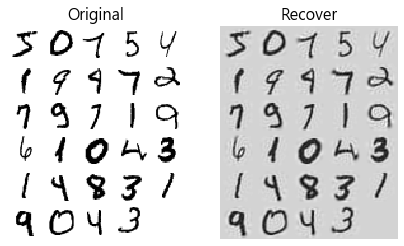

In [22]:
plt.figure(figsize=(7, 4),facecolor='white')
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recover", fontsize=16)
plot_digits(X_recovered[::2100])

In [23]:
# IPCA를 이용해서 MNIST 데이터를 돌려보자
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(batch_x)
X_reduced = inc_pca.transform(train_x)



....................................................................................................

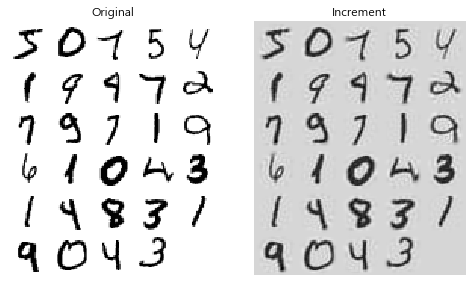

In [24]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)
plt.figure(figsize=(7, 4), facecolor='white')
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title('Original')
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.title('Increment')
plt.tight_layout()

In [25]:
## KPCA 예제
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [26]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [27]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

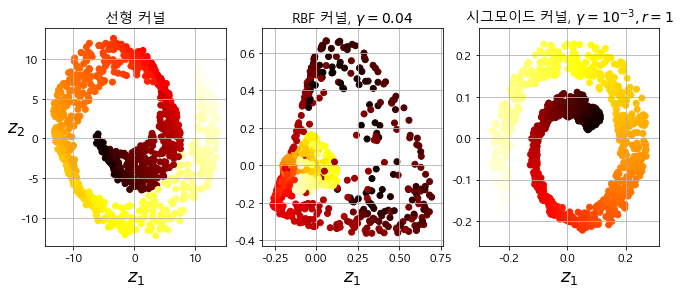

In [28]:
y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)

    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [
        {"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}
    ]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [30]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

9.2199239117032e-27

In [32]:
import time

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

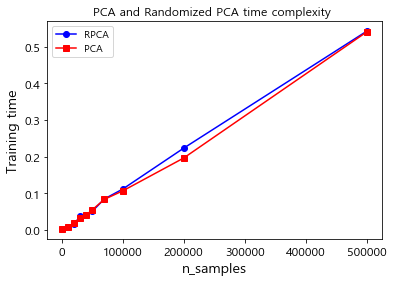

In [33]:
# RPCA과 PCA 속도 비교
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = rnd.randn(n_samples, 5)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

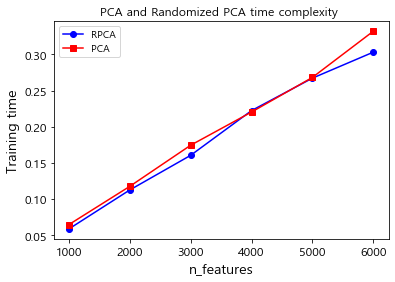

In [34]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = rnd.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [35]:
# 이 데이터는 미국 자궁경부암 관련 데이터로 어떤 변수들이 암의 유무에 중요한지를 알아보려고 합니다.
import pandas as pd
pd.set_option('display.max_columns', 500)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df = pd.read_csv(url, na_values="?")  # NaN값이 ?로 주어져있어 따로 알려주도록 하겠습니다.
df.head() # Show the first 5 rows

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [37]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# missing value들을 impute하고 데이터를 변환하기(이제 nan값이 평균값으로 되었습니다.)
Imputer.fit(df)
newdf =  pd.DataFrame(Imputer.transform(df))
newdf.columns = df.columns
newdf.index = df.index

newdf.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
%matplotlib notebook
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [39]:
sns.set(style='ticks')

In [40]:
# DX:Cancer column을 각 개인이 자궁경부암이 있는지 없는지 여부를 나타냅니다. 나머지는 feature입니다.
features=newdf.drop('Dx:Cancer',axis=1)
y=newdf['Dx:Cancer']

In [41]:
# PCA
pca=PCA(n_components=3)
X_r=pca.fit_transform(features)

In [42]:
# 각 component에 의해 설명되는 variance %
print("Explained variance:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
      .format(pca.explained_variance_ratio_[0],
              pca.explained_variance_ratio_[1],
              pca.explained_variance_ratio_[2]))

Explained variance:
PC1 59.41%
PC2 14.59%
PC3 9.02%


In [43]:
# 어떤 feature가 중요할까요? (어떤 변수의 loading이 높은지 알아내기 위해 쓰는 것 같은데 정확히 왜 extraclassifier를 쓰는지 모르겠..ㅠㅠㅠ)
from sklearn.ensemble import ExtraTreesClassifier

# Extra tree classifier
model = ExtraTreesClassifier()
features=newdf[0:]
model.fit(features, df["Dx:Cancer"])

# 중요한 feature들 줄세우기
importance = list(zip(model.feature_importances_, features.columns))
importance.sort(reverse=True)

# Print the feature importance
for value, name in importance:
    print("{}: {}".format(name, value))

Dx:Cancer: 0.4660104657224069
Dx:HPV: 0.2333437385655887
Dx: 0.14669848070137712
Dx:CIN: 0.02977678934477018
STDs:HPV: 0.027312902328769817
Smokes (packs/year): 0.011602069638469532
Num of pregnancies: 0.010924686852181842
IUD (years): 0.010547251786347309
First sexual intercourse: 0.007545369889651207
Biopsy: 0.007043801189432212
Age: 0.006572372033150025
Hormonal Contraceptives (years): 0.006079576607095106
Number of sexual partners: 0.005440318406385078
IUD: 0.005273682481492964
Schiller: 0.0043740623824554195
Citology: 0.004227369391007698
Smokes (years): 0.0038433933438427634
Hinselmann: 0.003325830359919778
Smokes: 0.0018568390801004357
Hormonal Contraceptives: 0.0017055067647215004
STDs (number): 0.0013641714259331273
STDs: 0.0011763483798578169
STDs:vulvo-perineal condylomatosis: 0.0009263461756654684
STDs:genital herpes: 0.0005844304581829867
STDs: Time since first diagnosis: 0.0005742433664862286
STDs: Number of diagnosis: 0.0004920729956774683
STDs:HIV: 0.0004350755857898687

<IPython.core.display.Javascript object>


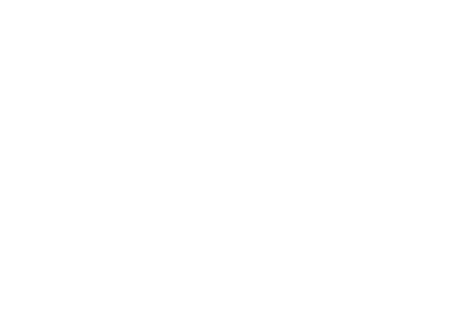

<IPython.core.display.Javascript object>


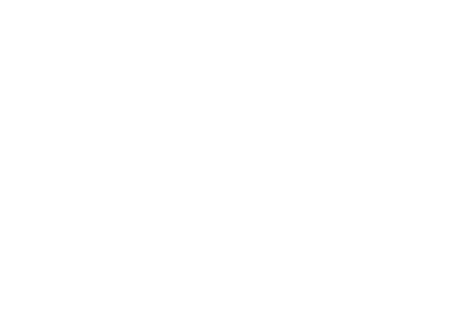

In [44]:
# 3D scatter plot 그리기(빨간점은 자궁경부암 환자, 파란색은 정상)
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<IPython.core.display.Javascript object>


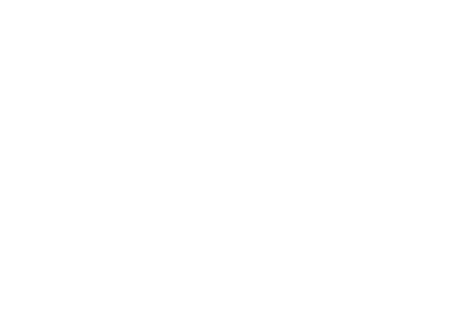

<IPython.core.display.Javascript object>


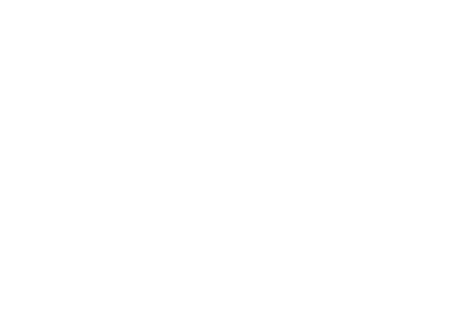

In [45]:
# Component 2개로 하면
plt.figure()
plt.scatter(X_r[:,0],X_r[:,1],c=y,cmap=plt.cm.coolwarm)

이 경우 각 Component가 variable들을 얼마나 반영하고 있는지 정확한 수치로 알 수 없기 때문에 구체적인 variable과 연관지어 설명을 할 수는 없지만 component로 설명을 해보겠습니다.
각 점들은 환자들을 나타내는 데, 축에 따라 component1의 특징을 양으로, 음으로 가지는지, component2의 특징을 많이 혹은 적게 가지는지 알 수 있습니다. 그런데 전반적으로 환자들이 대부분 정상인들과 비슷한 특징을 가지네요.. 딱 튀는 자궁경부암 환자의 특징은 있다고 하기 힘들것 같습니다. 적어도 이 데이터 수에서 만큼은요. 그리고 맨 위 빨간 점은 Component2의 특징을 많이 가지고 있는 환자라고 볼 수 있습니다. 그런데 보통 다른 빨간 점 환자들과는 혼자 outlier처럼 다른 곳에 가 있네요. 이 자궁경부암 환자는 다른 자궁경부암 환자에 비해 좀 component2의 특징을 많이 가진 환자라고 볼 수 있겠습니다.

In [46]:
## handwrite digits data로 실습
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [48]:
projected

array([[ -1.25946674,  21.27488406],
       [  7.95761172, -20.76870036],
       [  6.99192158,  -9.95598705],
       ...,
       [ 10.80128075,  -6.96025072],
       [ -4.87209254,  12.42394533],
       [ -0.34439073,   6.36555174]])

<IPython.core.display.Javascript object>


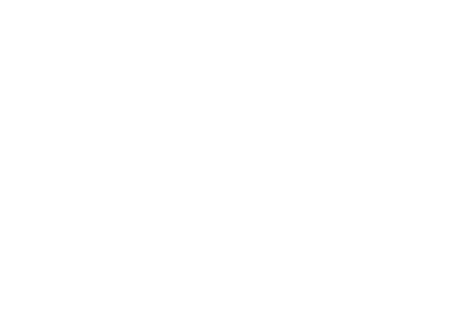

<IPython.core.display.Javascript object>


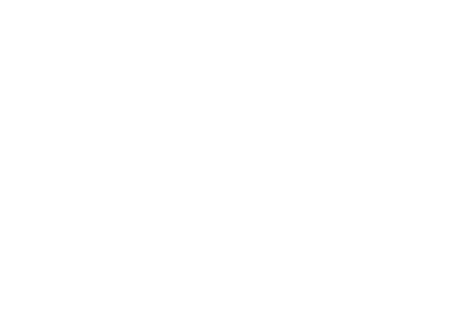

In [49]:
plt.figure(facecolor='white')
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<IPython.core.display.Javascript object>


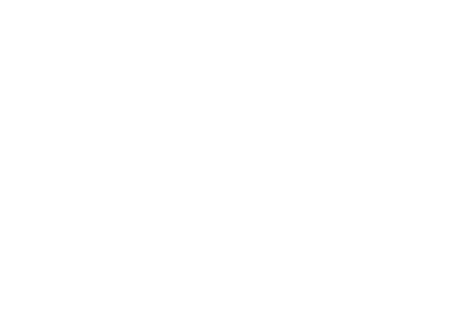

<IPython.core.display.Javascript object>


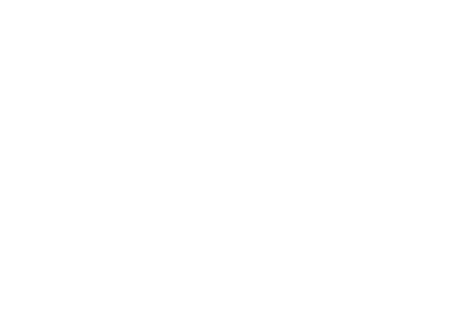

In [50]:
pca = PCA().fit(digits.data)
plt.figure(facecolor='white')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<IPython.core.display.Javascript object>


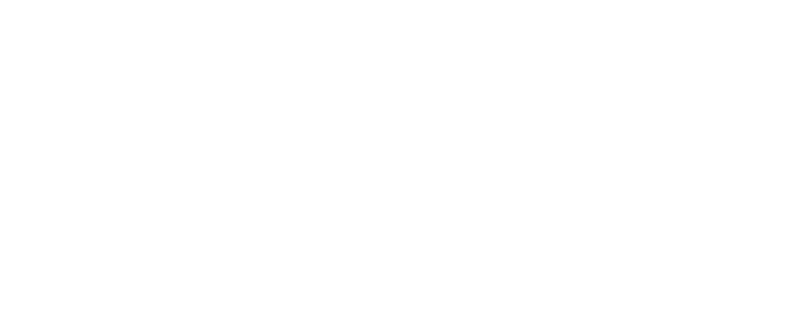

<IPython.core.display.Javascript object>


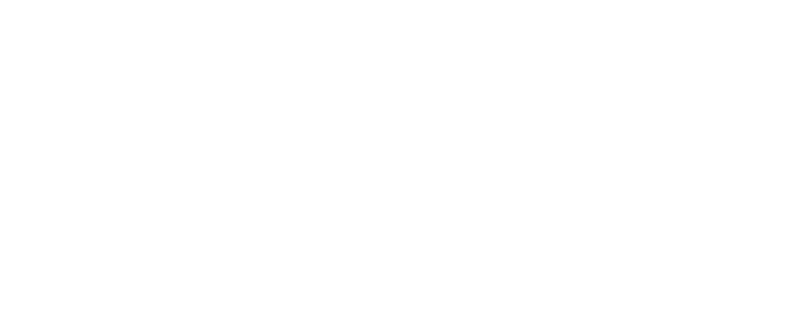

In [51]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

<IPython.core.display.Javascript object>


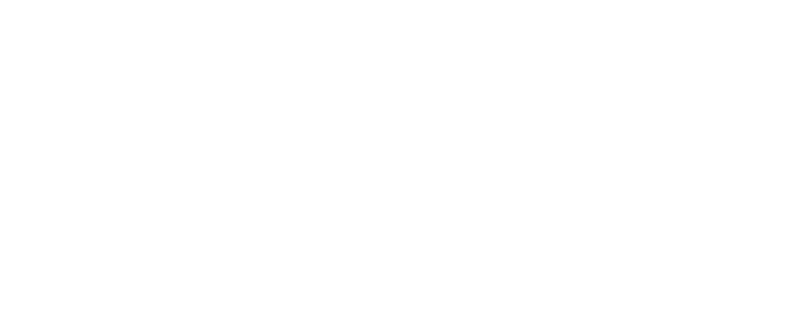

<IPython.core.display.Javascript object>


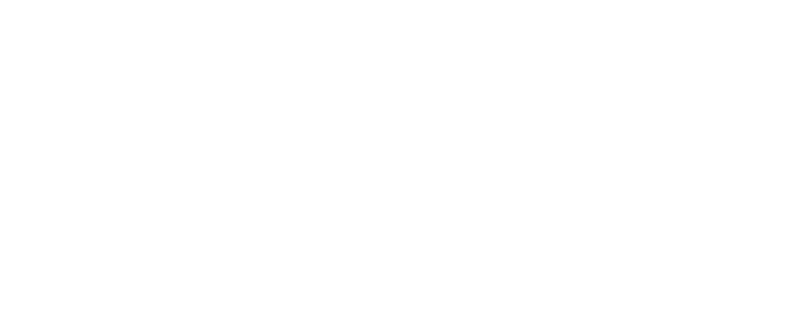

In [55]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [56]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

<IPython.core.display.Javascript object>


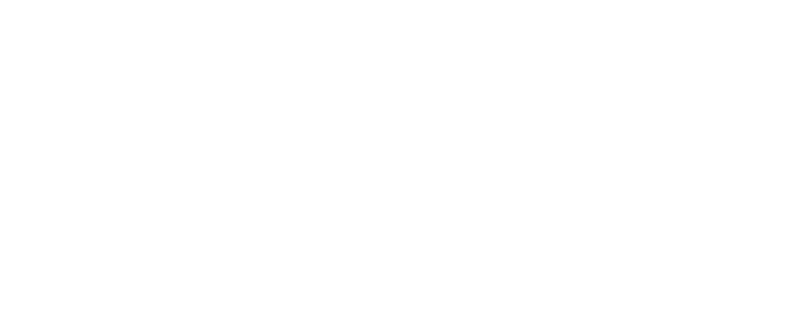

<IPython.core.display.Javascript object>


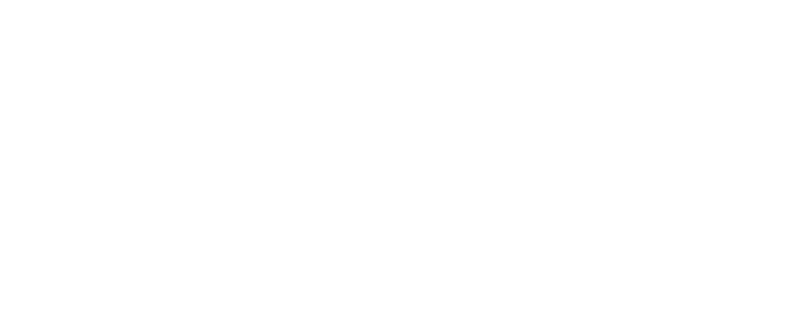

In [57]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# LLE 실습

In [58]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [59]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

<IPython.core.display.Javascript object>


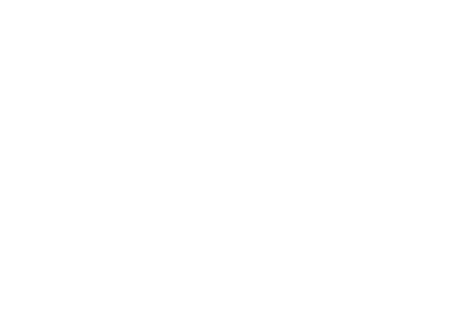

<IPython.core.display.Javascript object>


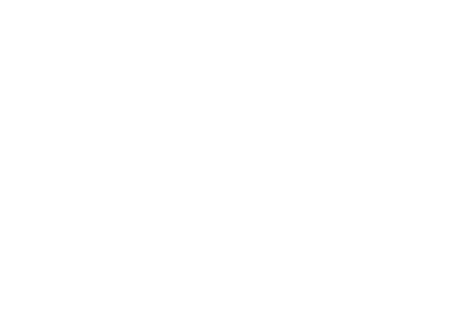

In [60]:
plt.title("Swiss roll by using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

# 그 외 차원 축소 기법들 실습

In [61]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [62]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

<IPython.core.display.Javascript object>


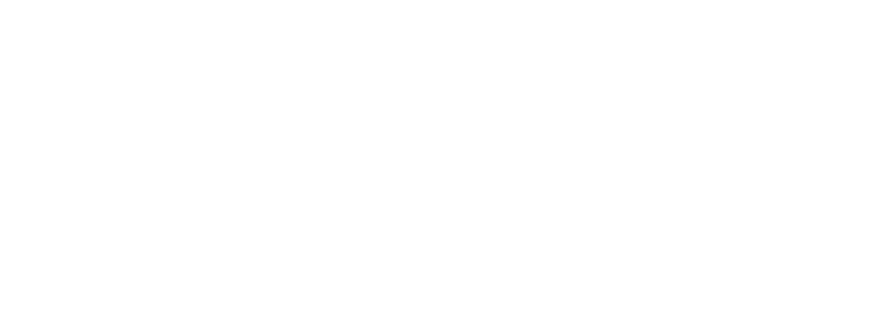

<IPython.core.display.Javascript object>


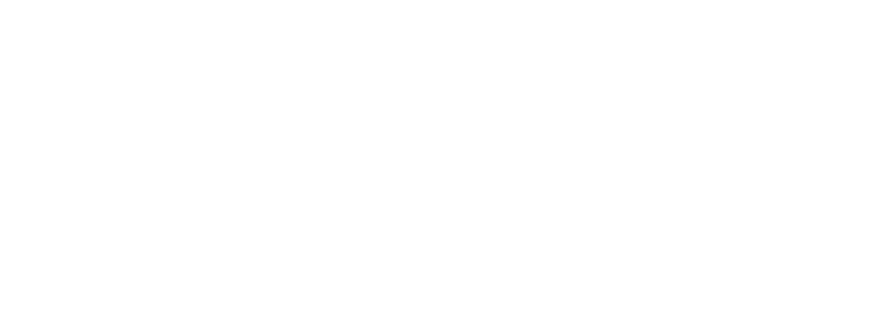

In [64]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# Mnist 활용해서 PCA, T-sne 비교

<IPython.core.display.Javascript object>


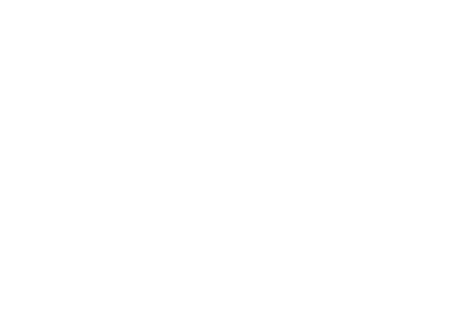

<IPython.core.display.Javascript object>


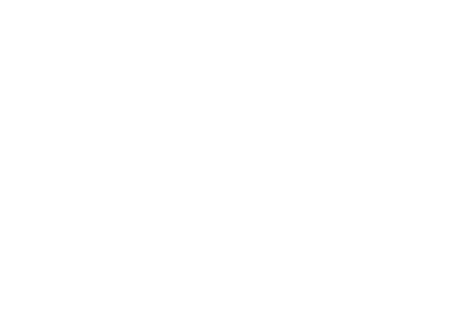

In [65]:
# load library

from sklearn.datasets import load_digits

import matplotlib

import matplotlib.pyplot as plt



# matplotlib 설정

matplotlib.rc('font', family='AppleGothic') # 한글 출력

plt.rcParams['axes.unicode_minus'] = False # 축 - 설정



# data load

digits = load_digits()



# subplot 객체 생성

fig, axes = plt.subplots(2, 5, #  subplot객체(2x5)를 axes에 할당

                         subplot_kw={'xticks':(), 'yticks':()}) # subplot 축 눈금 해제



for ax, img in zip(axes.ravel(), digits.images): # axes.ravel()과 digits.images를 하나씩 할당

    ax.imshow(img)

plt.gray() # 그래프 흑백

plt.show() # 그래프 출력

<IPython.core.display.Javascript object>


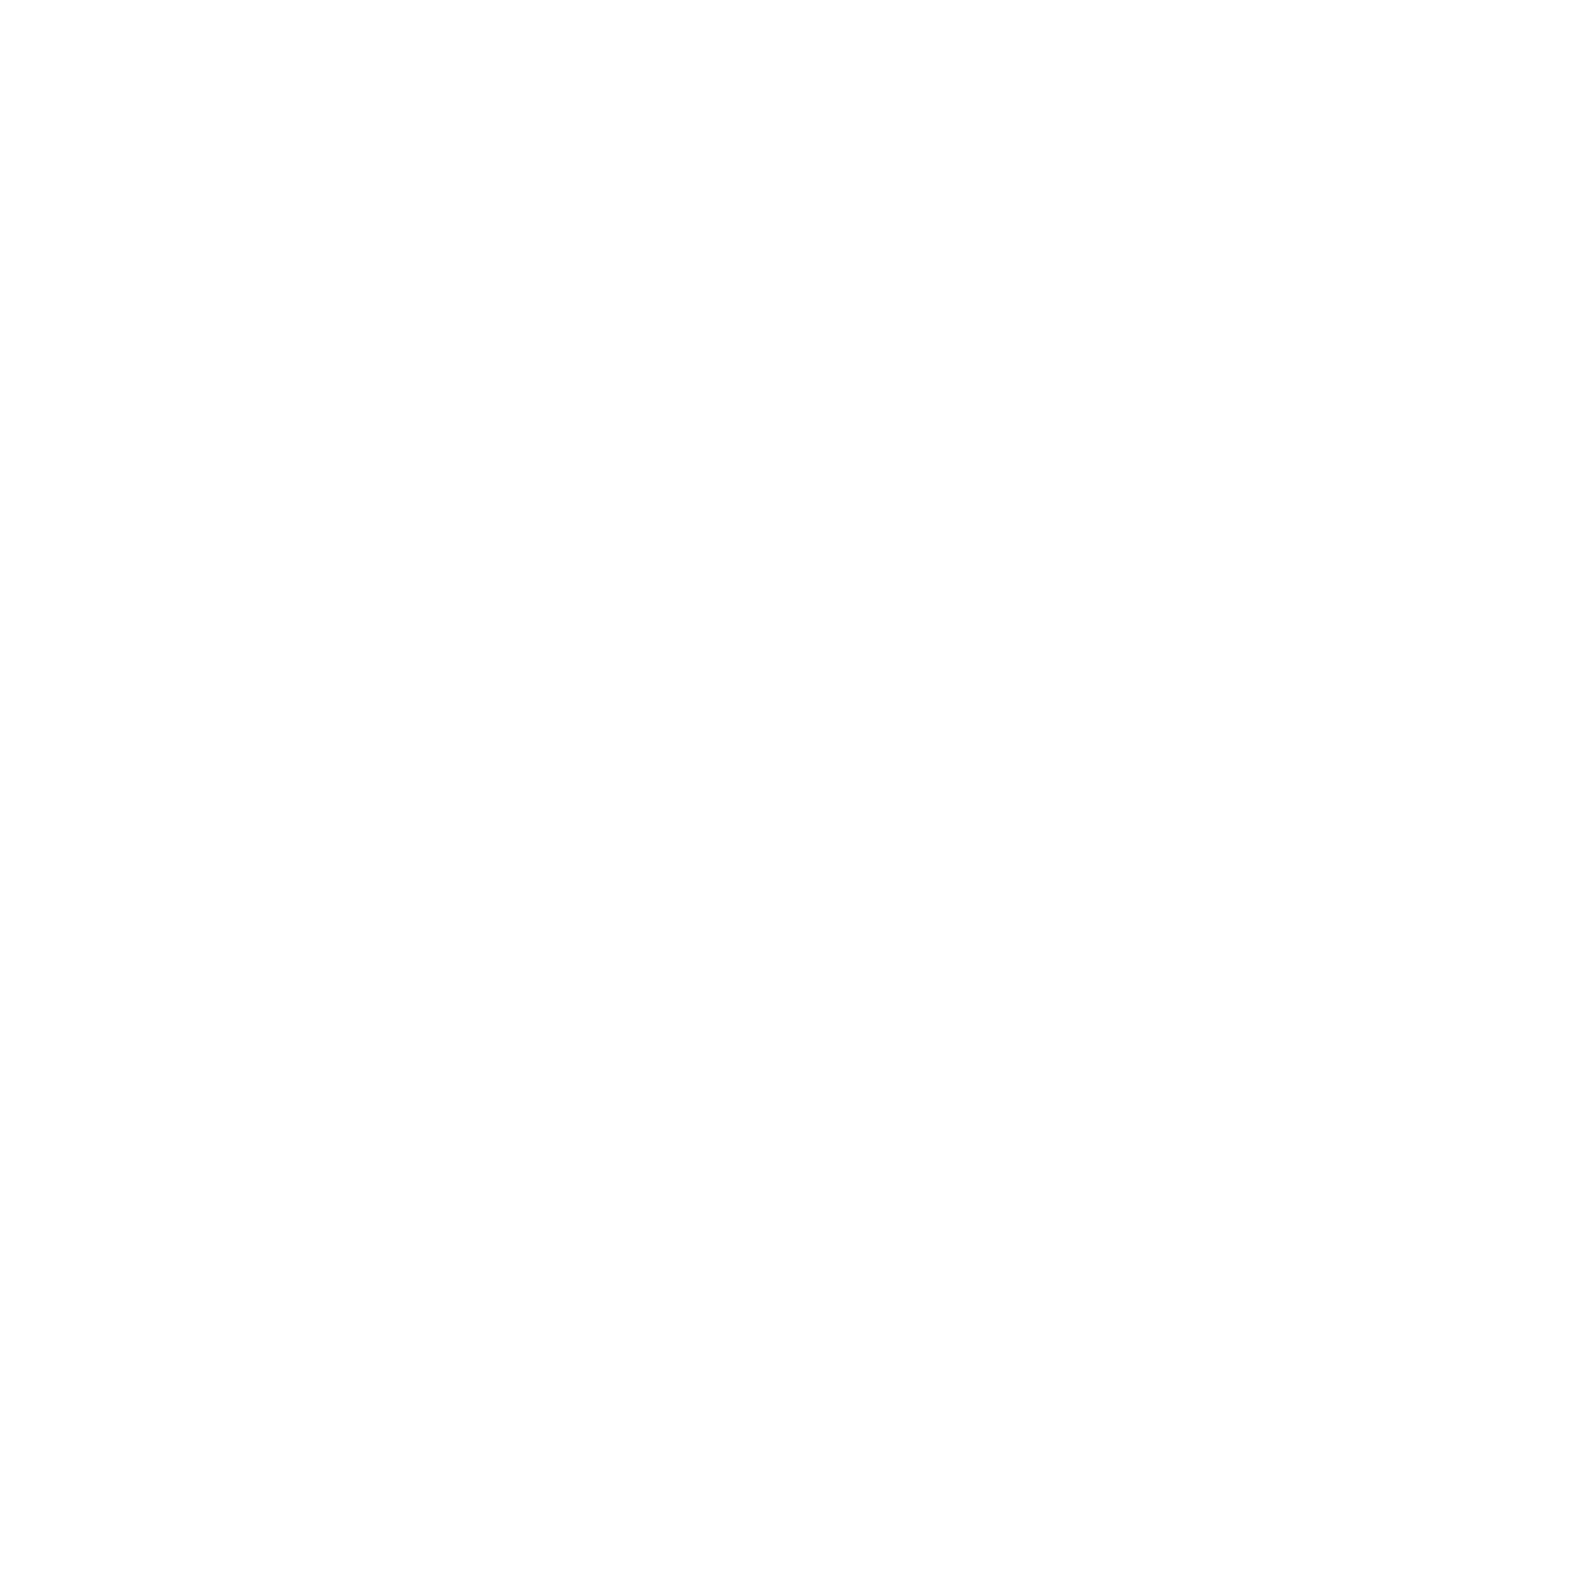

<IPython.core.display.Javascript object>


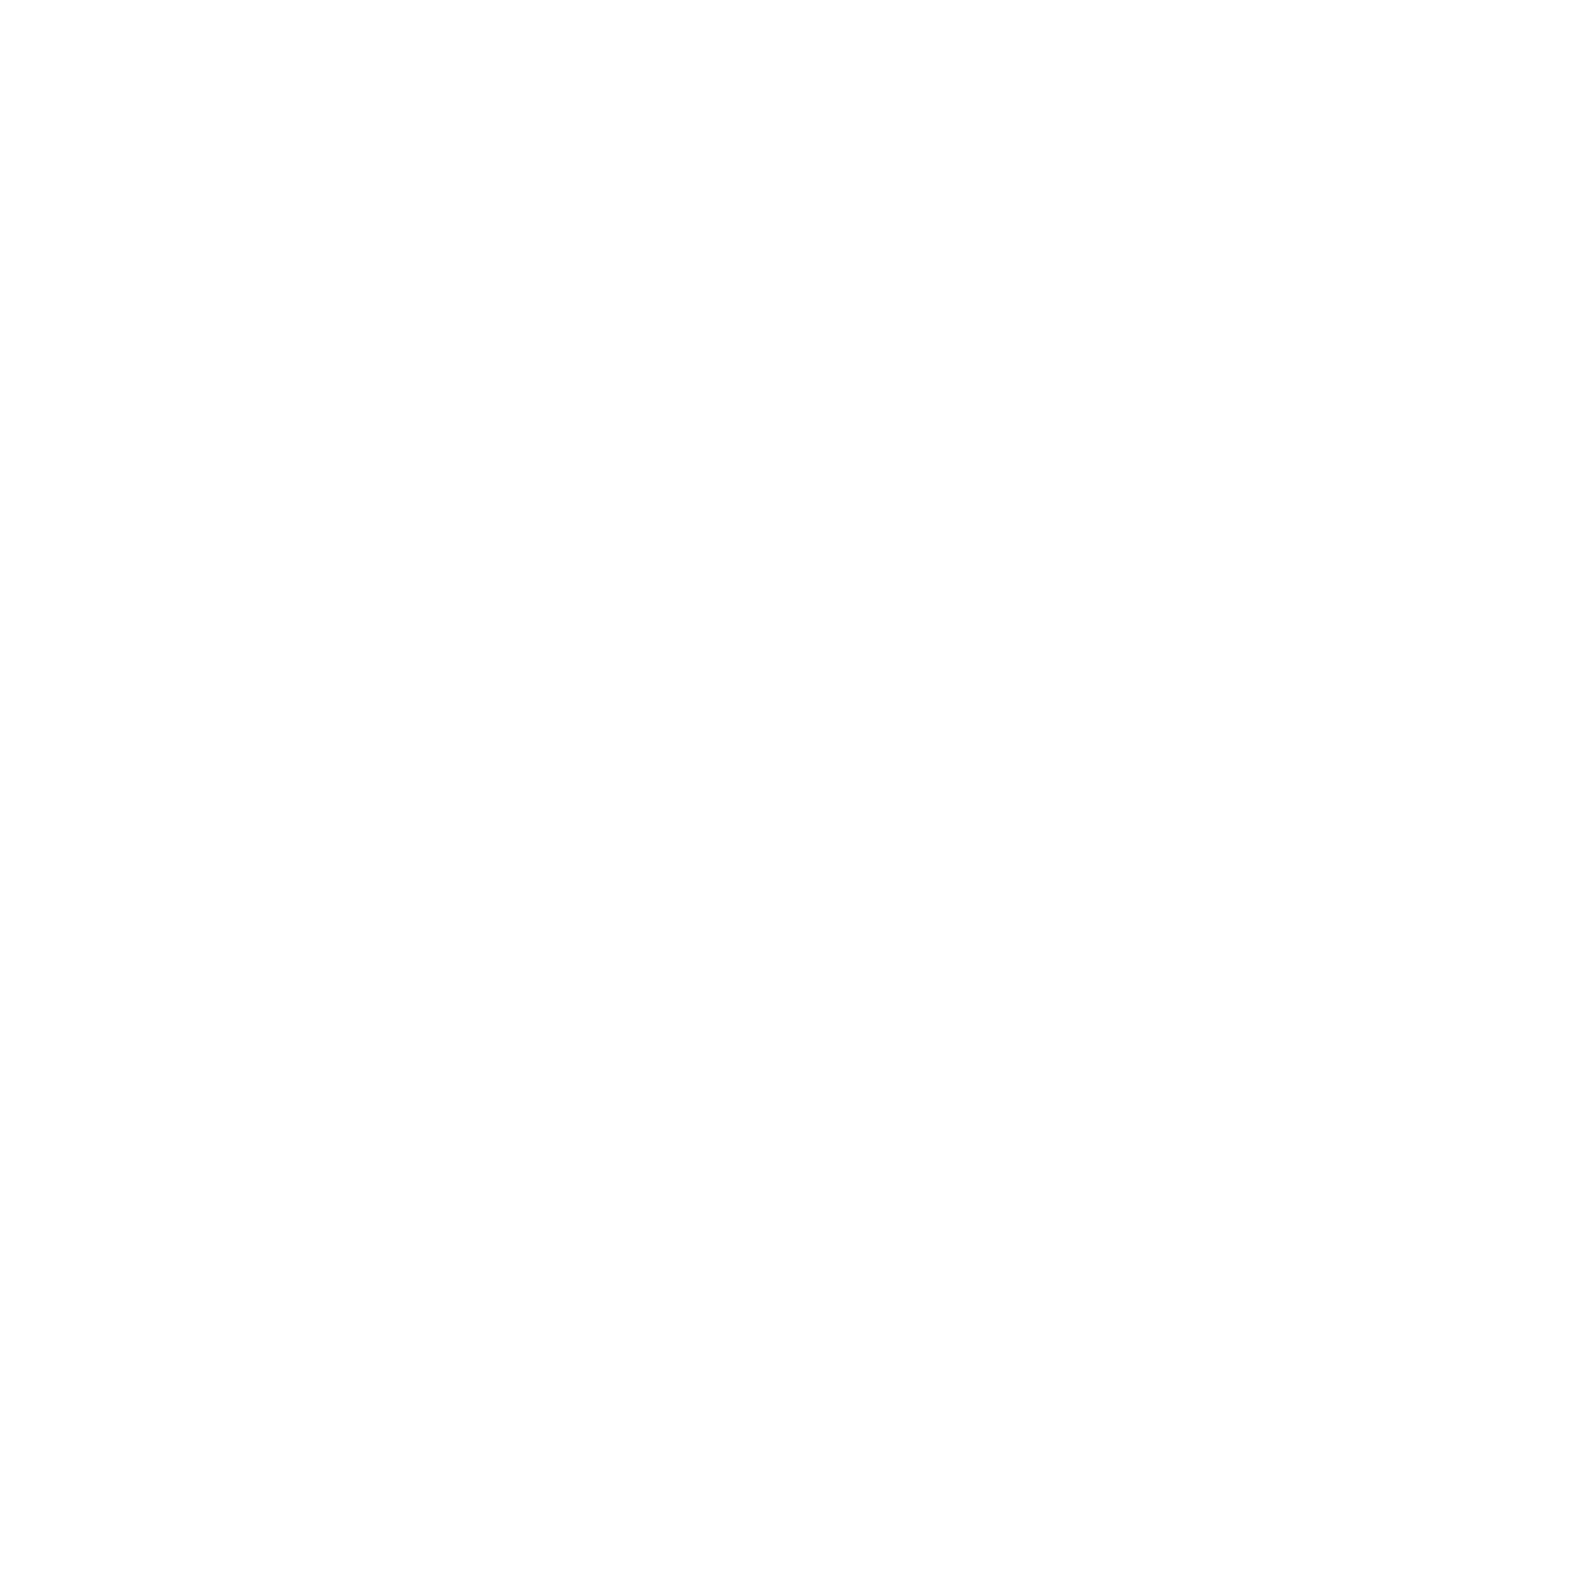

In [66]:
### 처음 두 개의 주성분을 이용해 그래프를 그리고 각 샘플을 해당하는 클래스의 숫자로



from sklearn.decomposition import PCA



# PCA 모델을 생성

pca = PCA(n_components=2) # 주성분 갯수

pca.fit(digits.data) # PCA 적용



# 처음 두 개의 주성분으로 숫자 데이터를 변환

digits_pca = pca.transform(digits.data) # PCA를 데이터에 적용

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',

               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']


plt.figure(figsize=(20,20))

for i in range(len(digits.data)): # digits.data의 길이까지 정수 갯수

    # 숫자 텍스트를 이용해 산점도 그리기

    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), # x, y, 그룹; str은 문자로 변환

             color=colors[digits.target[i]], # 산점도 색상

             fontdict={'weight':'bold', 'size':9}) # font 설정

plt.xlim(digits_pca[:, 0].min(), digits_pca[:,1].max()) # 최소, 최대

plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max()) # 최소, 최대

plt.xlabel('first principle component') # x 축 이름

plt.ylabel('second principle componet') # y 축 이름

plt.show()

<IPython.core.display.Javascript object>


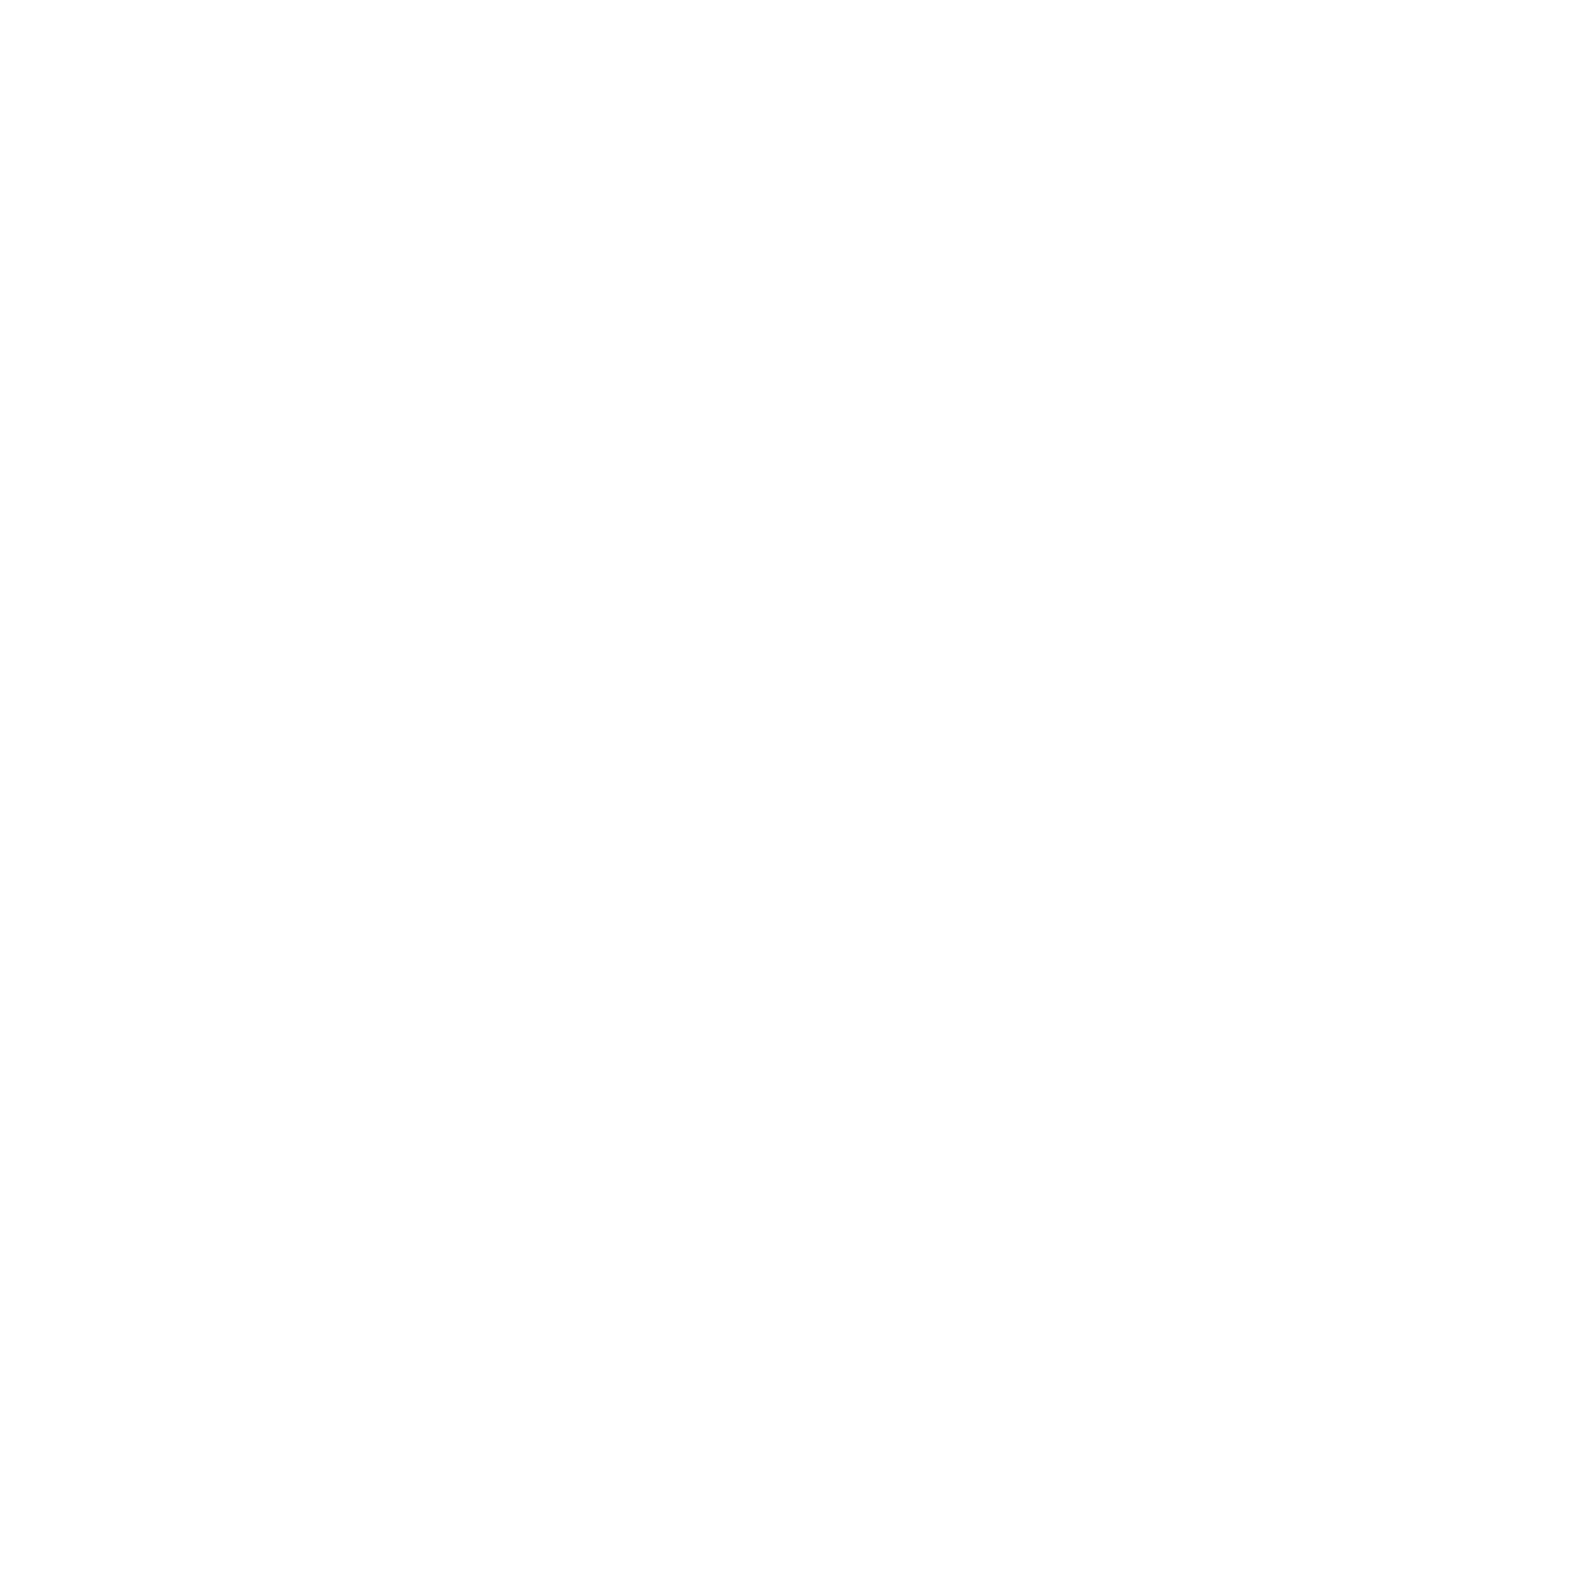

<IPython.core.display.Javascript object>


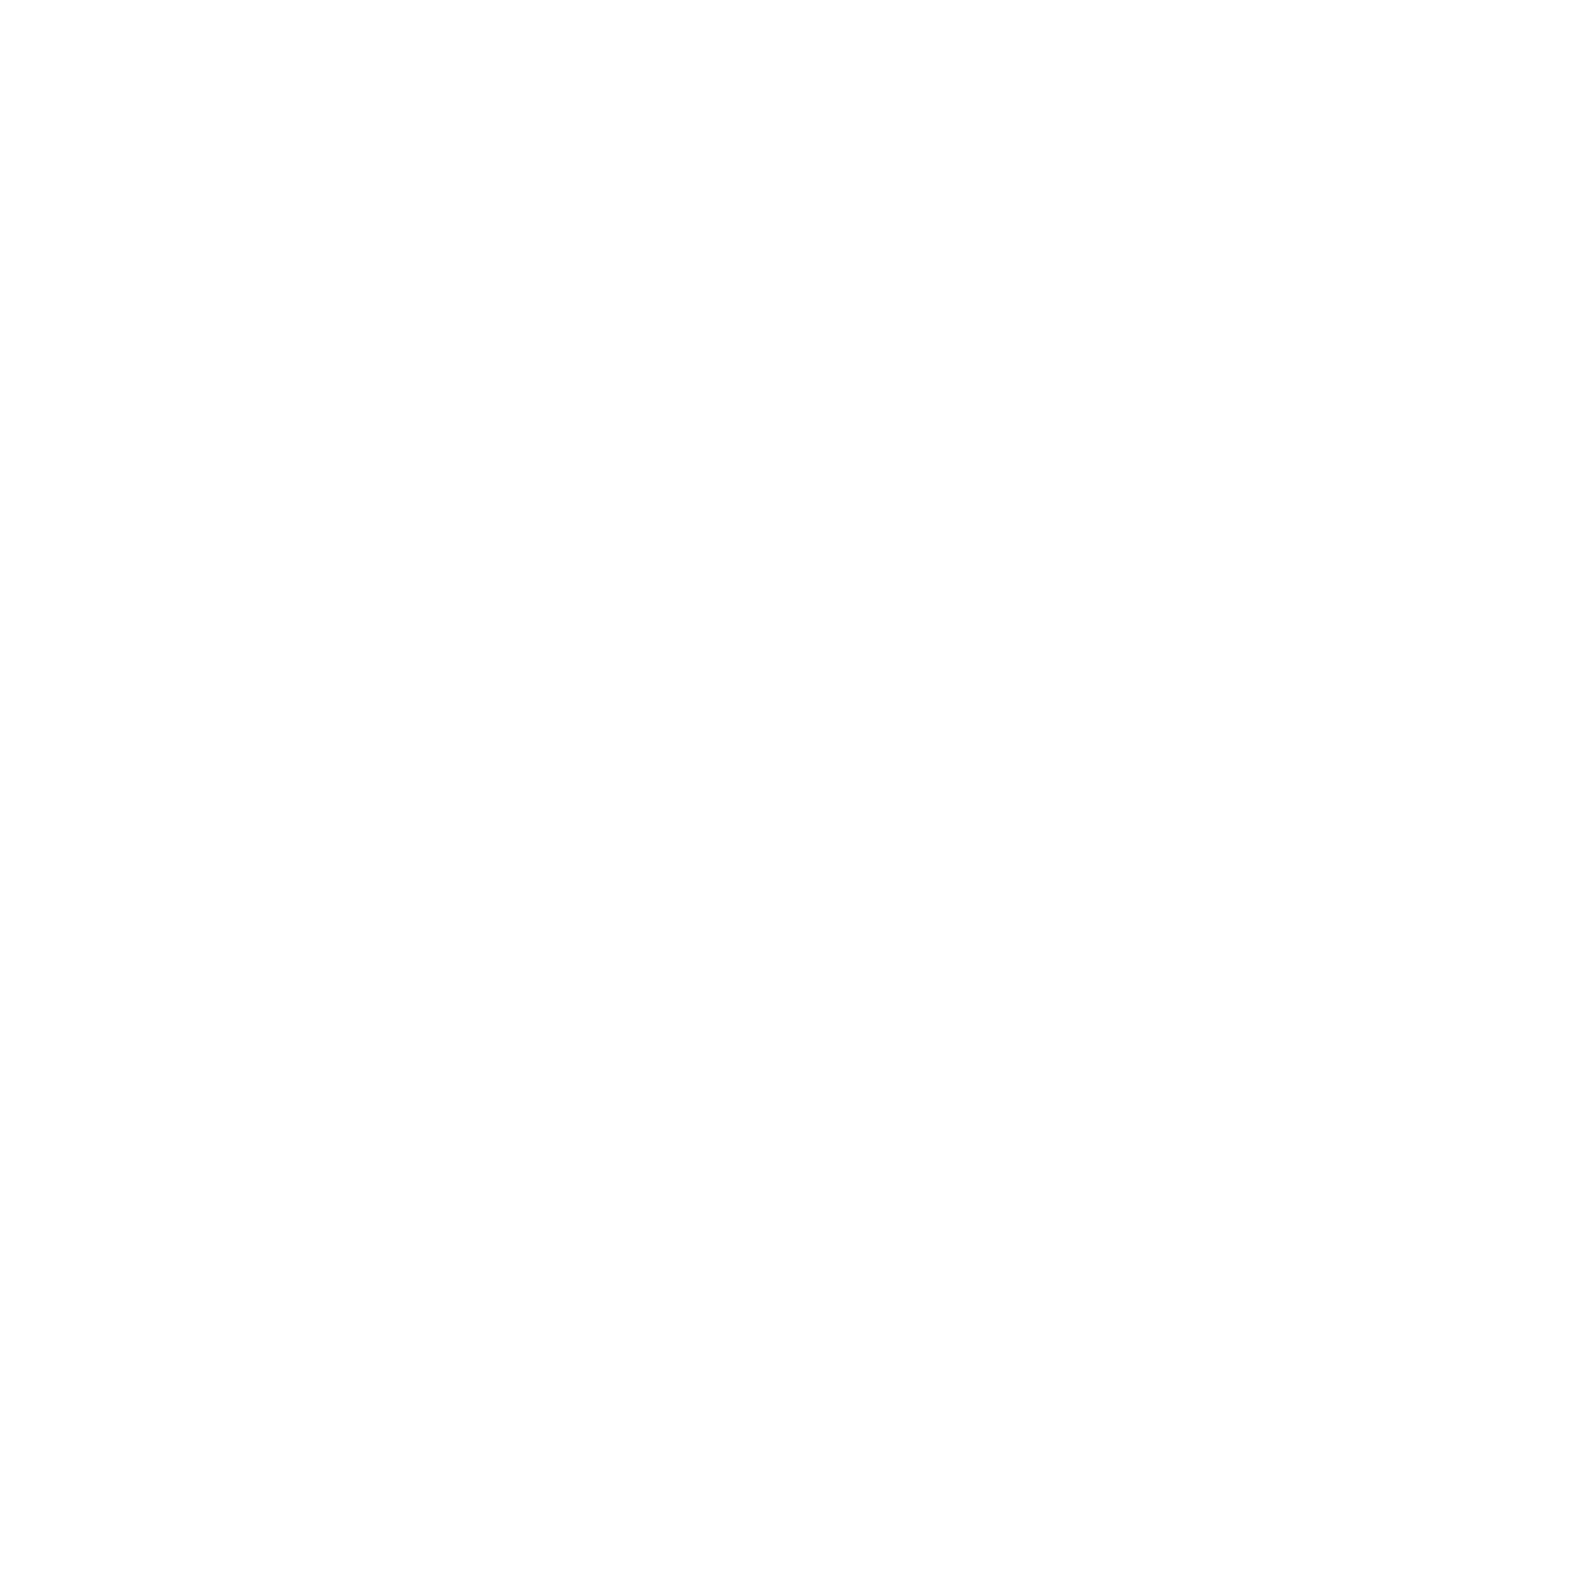

In [67]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음

# library import

from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(20,20))

# 시각화

for i in range(len(digits.data)): # 0부터  digits.data까지 정수

    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹

             color=colors[digits.target[i]], # 색상

             fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대

plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 특성0') # x축 이름

plt.ylabel('t-SNE 특성1') # y축 이름

plt.show() # 그래프 출력